In [70]:
d = pd.read_csv('/Users/eczech/data/meetups/genomics/data_subset_v2.csv')
d.head()

,cn:A1CF,cn:A4GALT,cn:AACSP1,cn:ABCC3,cn:ABCC9,cn:ABCE1,cn:ABHD12,cn:ABHD13,cn:ABHD16B,cn:ABHD3,...,mu:RBPJ:R238,mu:ROBO1:F755Lfs28,mu:RPL22:K15Rfs5,mu:SHROOM4:E1138dup,mu:TGFBR2:K153Sfs35,mu:TPRXL:S124-S127del,mu:TRAF2:P9Lfs77,mu:UBXN11:P503-G504insCP,mu:VEZF1:Q354del,response
0,0.194500,0.432997,-0.016968,-0.596004,-0.141840,0.753568,-0.345747,0.040756,-0.881591,0.084565,...,0,0,0,0,0,0,0,0,0,0.434701
1,-1.031398,-0.871603,0.181213,-0.088128,0.104466,-0.547219,0.065330,0.994535,0.486748,-0.964783,...,0,0,0,0,0,0,0,0,0,1.754231
2,0.572291,-1.140732,0.200764,1.128169,0.622913,-0.651240,1.067499,-0.775206,-0.588770,-1.173250,...,0,0,0,0,0,0,0,0,0,0.540094
3,0.021195,0.236555,-0.319635,-0.788885,-0.327795,0.483008,0.880886,0.245370,0.549911,-0.055192,...,1,0,0,0,0,0,0,0,0,-1.109348
4,-0.451877,-0.236535,0.554786,1.097311,0.414911,-0.266678,0.137125,0.769766,-0.214158,0.589504,...,0,0,0,0,0,0,0,0,0,1.676012


In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.8)
d_fit = pca.fit_transform(d)
d_fit.shape

(237, 94)

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(init='pca', learning_rate=1000)
d_trans = tsne.fit_transform(d)
d_trans.shape

(237, 2)

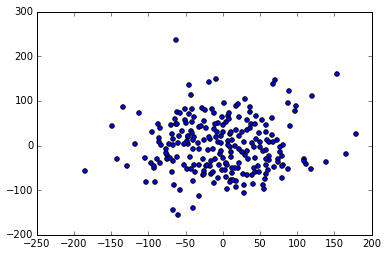

In [17]:
%matplotlib inline
plt.scatter(d_trans[:,0], d_trans[:,1])

In [25]:
np.vstack([np.eye(2), np.eye(2)])

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [83]:
from scipy import stats
c1 = np.repeat(7.5, 3)
c2 = np.repeat(10, 3)
c3 = np.repeat(12.5, 3)
d = []
for i, c in enumerate([c1, c2, c3]):
    n = 250
    r = np.random.multivariate_normal(c, np.eye(len(c)), size=n)
    r = np.resize(r, (n, len(c)+1))
    r[:, len(c)] = np.repeat(i, n)
    d.append(r)

d = np.vstack(d)
d.shape

(750, 4)

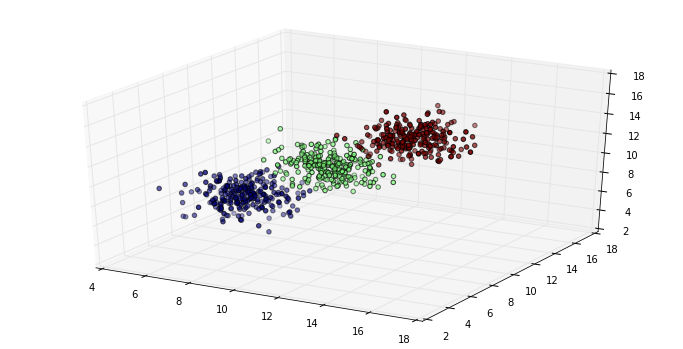

In [84]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d[:,0], d[:,1], d[:,2], c=d[:,3])

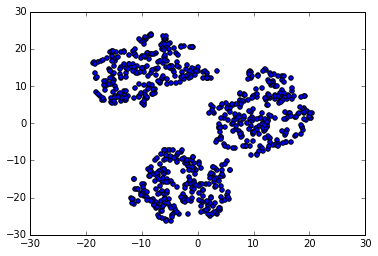

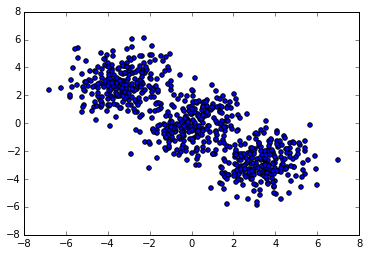

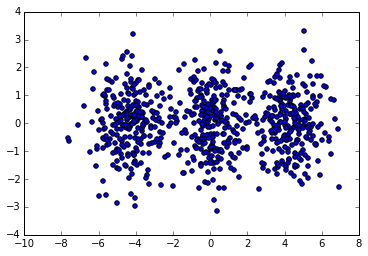

In [85]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
d_in = d[:, :3]
d_fit = TSNE().fit_transform(d_in)
plt.scatter(d_fit[:, 0], d_fit[: , 1])

plt.figure()
d_fit = MDS().fit_transform(d_in)
plt.scatter(d_fit[:, 0], d_fit[: , 1])

plt.figure()
d_fit = PCA().fit_transform(d_in)
plt.scatter(d_fit[:, 0], d_fit[: , 1])